# HackEDU Machine Learning and Data Science for Chemical Biology - Lecture 2 - Nov 4th, 2019

Taught by Nathan Barlow: nathan.barlow@imperial.ac.uk
TAs: Rob Strutt and Hisham Abdel Aty: r.strutt17@imperial.ac.uk , hisham.abdel-aty15@imperial.ac.uk 

## Topics for Today: Supervised Learning

0. discuss any missed topics or questions from last session (up to 10 minutes)
1. cost/loss functions (13 minutes)
2. scikit learn regression (10 minutes)
3. scikit learn classifiction (15 minutes to 25 minutes)
5. 1-Hour lab practical - calibrating a syringe pump

# Basic Examples:

## We will cover linear regression to predict continuous data

i.e.
### $y = mx+b$

## And logistic regression to predict binary (True/False) data

i.e. 

### $y = \frac{1}{1+e^{-kx}}$

True if y>threshold

else False

### Training these models means minimizing the cost (or loss) function

In [1]:
# useful imports for todays lecture
import matplotlib.pyplot as plt
import numpy as np

## 1 . Cost/loss functions
### linear regression

If we have a system that we want to study, we can perturb the system and track the changes. This is what you can do in the lab.

If you want to model this system we can set down some mathematical equations. But how do we then see how well the models work? We have to use loss (cost) functions:

The most common and simplest form is the mean square error (L2 Loss). 

# $MSE = \frac{\sum_{i=1}^{n}(y_{model}-y_{experiment})^2}{n}$

This, and variants, are used for regression.

# $y_{model} = mX+b$

or more generally:

# $y_{model} = b_0+b_1 X_1+b_2 X_2+...+b_jX_j$

to fit the data $x,y_{experiment}$



Text(0, 0.5, 'y')

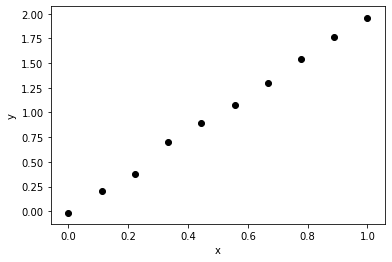

In [2]:
# in python; mean square error
def mse(prediction, target):
    return np.sum((prediction-target)**2)

# if we have data that looks like this...
x = np.linspace(0,1,10)
y = x*2+np.random.randn(10)/20
plt.scatter(x, y, c='k')
plt.xlabel('x')
plt.ylabel('y')

By eye it looks like y=mx+b where the slope is 2 and the intercept is zero. We can see if the mse is high or low for a few guesses; for example, the last point looks like it should be 2, and the 5th index should be 1.1...

In [3]:
m_guess = 1.99
prediction = np.array([0, m_guess*0.6, m_guess*1])
actual = np.array([y[0], y[5], y[-1]])
print('mean square error : ', mse(prediction, actual))


mean square error :  0.01443517503015525


## Comment 1: Optimization

the question remains is how can we make the computer find the best (minimized) solution?

For example, in MS Excel you would use a generalized reduced gradient (GRG). We can look at the simplest example of gradient descent by taking the derivative of the loss function.

# $\frac{dMSE}{dm} = \frac{1}{n}\sum_{i=1}^{n}((mx+b)-y_{experiment})x$

**This is beyond the scope of this course, but know that this exists and is important**


## Comment 2: Heteroscedasticity and Residual Analysis

when your variables vary unequally across your data. If you have a linear fit of data, but the variation magnitude increases as you increase the independent variable, you may have to do some math tricks.

Text(0.5, 1.0, 'residuals')

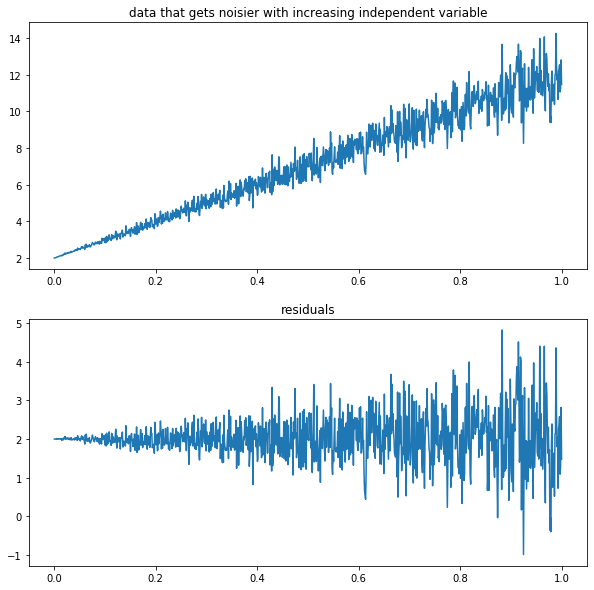

In [4]:
X = np.linspace(0, 1, 1000)
y = X*10+X*np.random.randn(1000)+2
res = (y-X*10)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X,y)
plt.title('data that gets noisier with increasing independent variable')
plt.subplot(2,1,2)
plt.plot(X,res)
plt.title('residuals')

C:\Users\nebarlow\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


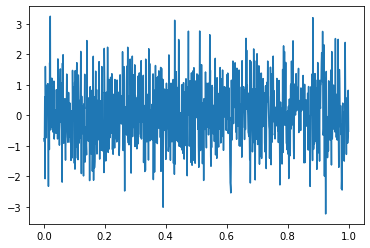

In [5]:
# weighted residuals (WLS)
res = (y-X*10-2)/X
plt.plot(X,res)

Out of scope of this course but is a commonly overlooked statistical problem in science.

### Classification

If we have a model that predicts categories, there are special loss functions for this that measure prediction correctness, such as 'Hinge Loss' or 'Cross Entropy Loss'; which is sum of True Probability times the log of the estimated value.

# $CrossEntropy = -y_{target} log(P(y_{prediction})) - (1-y_{target}) log(1-P(y_{prediction}))$

Note 

$log(1) = 0$

$log(0)$ goes to $-\inf$

for example, say that we have a model that predicts an image is of a cat, a dog, a horse, or a bird. The model will output a probability distribution that will sum to 1. Similar to the mean square error, how can we measure how good this model when comparing it to ground truth data.

#### Note: One-Hot Encoding
cat1 = [1,0,0,0]  a cat

cat2 = [0,1,0,0]  a dog

cat3 = [0,0,1,0]  a horse

cat4 = [0,0,0,1]  a bird


In [6]:
def cross_entropy(predictions, targets, epsilon=0):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    # clip to keep the values between 1e-12 and 1-1e-12 (or  effectively 0 to 1)
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    print(predictions)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions))/N
    return ce


In [7]:
# Note: what clip does
a = np.arange(10)
print('a, ', a)
print('clip a at 4 and 5:', np.clip(a,4,5))


a,  [0 1 2 3 4 5 6 7 8 9]
clip a at 4 and 5: [4 4 4 4 4 5 5 5 5 5]


Lets make some predictions that are:
1. not very confident
2. confident and inaccurate
3. confident and accruate

In [8]:
# ground truth
targets = np.array([[0,0,0,1]])

# example predictions P(y) - could be from logistic regression
predictions1 = np.array([[0.25, 0.25,0.25,0.25]])

predictions2 = np.array([[0.97,0.01,0.01,0.01]])

predictions3 = np.array([[0.01,0.01,0.01,0.97]])


print(cross_entropy(predictions1, targets), cross_entropy(predictions2, targets),cross_entropy(predictions3, targets))


[[0.25 0.25 0.25 0.25]]
[[0.97 0.01 0.01 0.01]]
[[0.01 0.01 0.01 0.97]]
1.3862943611198906 4.605170185988091 0.030459207484708574


Takeaway: **We can see here that this is a handy way to penalize overconfidence in a prediction.**

## 2 . Sklearn and Linear Regression

Luckily, there are packages that can do a lot of the work for us in scikit-learn.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression


Lets walk through the documentation....



### Overfitting and Regularization
#### L1 Lasso Regression and L2 Ridge Regression

This is a technique to prevent overfitting:

Ridge adds sum of square of coefficients term to the MSE: $\alpha \sum b_j^2$

# $MSE_{ridge} = \frac{\sum_{i=1}^{n}(y_{model}-y_{experiment})^2}{n}+\alpha (m^2)$

Lasso adds sum of the absolute values: $\alpha \sum |b_j|$

# $MSE_{lasso} = \frac{\sum_{i=1}^{n}(y_{model}-y_{experiment})^2}{n}+\alpha (|m|)$

Key Difference: Lasso shrinks the less important features, causes a feature loss.

(10, 1)
Standard: the coefficients fit are [[0.80395301]], with a score of 0.5277198636491883
Lasso: the coefficients fit are [0.25849847], with a score of 0.2848021194758692
Ridge: the coefficients fit are [[0.76236923]], with a score of 0.5263080090793777


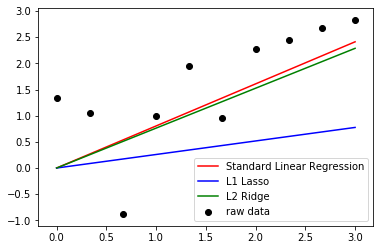

In [9]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

X = np.linspace(0,3,10)
X = X.reshape(-1,1)
np.random.seed(10)
y = X*1+np.random.randn(10,1)
print(y.shape)

clf = LinearRegression()
clf.fit(X,y)
print(f"Standard: the coefficients fit are {clf.coef_}, with a score of {clf.score(X,y)}")
plt.plot(X,X*clf.coef_[0], 'r', label='Standard Linear Regression')


clf = Lasso(alpha=0.5)
clf.fit(X,y)
print(f"Lasso: the coefficients fit are {clf.coef_}, with a score of {clf.score(X,y)}")
plt.plot(X,X*clf.coef_[0], 'b', label='L1 Lasso')

clf = Ridge(alpha=0.5)
clf.fit(X,y)
print(f"Ridge: the coefficients fit are {clf.coef_}, with a score of {clf.score(X,y)}")
plt.plot(X,X*clf.coef_[0], 'g', label='L2 Ridge')

plt.scatter(X,y, c='k', label='raw data')

plt.legend()

### Polynomial Regression
Lets have a look at a more enlightening example. Say we have a polynomial system, Sklearn has a useful transformation called **PolynomialFeatures**. For example: the case of 2 dimensions, the features can be combined to a polynomial model that looks like this: 

# $[x_1, x_2] ->[1, x_1, x_2, x_1x_2, x_1^2,x_2^2]$

(Note that this is still considered a 'linear model').

To more easily visualize an example, lets take the n degree polynomial transformation for 1 dimension:

# $X->[1, X, X^2, ...., X^n]$

We can build an example data set that is :

# $y_{model} = cos (1.5 \pi X)$

Then we can try to overfit the model:

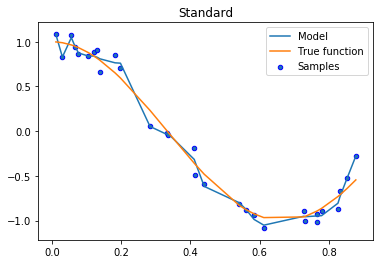

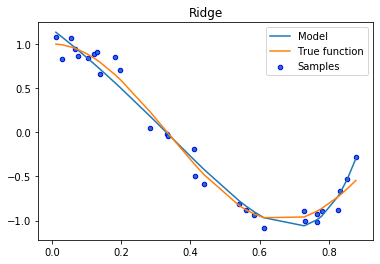

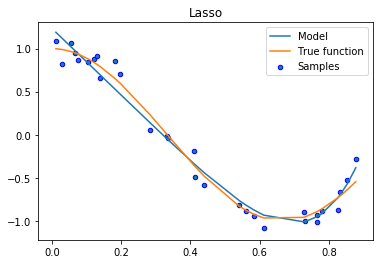

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return np.cos(1.5 * np.pi * X)
    #return X**2+X

def plot_linear_regression(clf, X, y, X_poly, title):
    clf.fit(X_poly, y)
    plt.title(title)
    plt.plot(X, clf.predict(X_poly), label="Model")
    plt.plot(X, true_fun(X), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.legend(loc='best')
    plt.show()


n_samples = 30
X = np.sort(np.random.rand(n_samples)).reshape(-1,1)
y = true_fun(X) + np.random.randn(n_samples,1) * 0.1

poly = PolynomialFeatures(degree=20,include_bias=False)
X_poly = poly.fit_transform(X)

clf = LinearRegression()
plot_linear_regression(clf, X, y, X_poly, 'Standard')

clf = Ridge(alpha=0.01)
plot_linear_regression(clf, X, y, X_poly, 'Ridge')

clf = Lasso(alpha=0.001)
plot_linear_regression(clf, X, y, X_poly, 'Lasso')

Here we see that the polynomial is overfit for the standard linear model, but the penatly for having lots of parameters for the Lasso and Ridge regression keeps the model from overfitting.

Sklearn has a nice 'Pipeline' module that can be used to facilitate this transform.

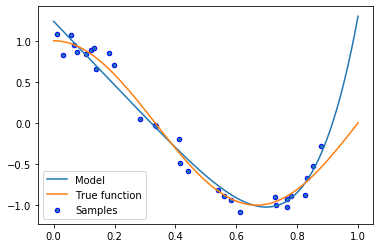

In [11]:
pipeline = Pipeline([("polynomial_features", poly),("linear_regression", clf)])
pipeline.fit(X, y)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.legend(loc='best')

## 3. Sklearn Classification


#### Recall from last lecture, we have models such as logistic regression that can be used for binary classification

#### Let's build some toy data sets to try some classification first hand

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.preprocessing import StandardScaler


# classifiable data with 2 features
X,y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, class_sep = 0.8, random_state=18)
# zero mean and unit standard deviation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X,y)
print(f'data: mean {np.mean(X_scaled)} and stdev {np.std(X_scaled)}')

# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



# random data with 2 features - uzero mean and unit standard deviation by default
X_rand = 1*np.random.randn(100,2)+0
y_rand = np.random.randint(2, size=100)*2-1


X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X_rand, y_rand, test_size=0.33, random_state=42)

data: mean -7.993605777301127e-17 and stdev 0.9999999999999999


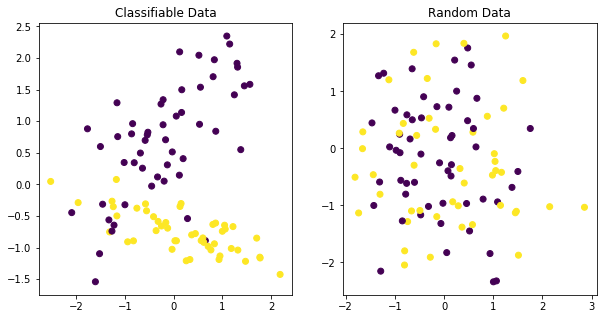

In [13]:
# plot this data
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Classifiable Data')
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y)

plt.subplot(1,2,2)
plt.title('Random Data')
plt.scatter(X_rand[:,0], X_rand[:,1], c=y_rand)

## Recall the Confusion Matrix and Roc Plot

In [14]:
# confusion matrix
def conf_mat(y_pred, y_test, title):
    cm = confusion_matrix(y_pred,y_test)
    sns.heatmap(1*(cm-np.min(cm))/(np.max(cm)-np.min(cm)), annot=True, xticklabels=['class 1', 'class -1'], yticklabels=['TP', 'FP'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    
# roc plot
def roc_plot(clf, X_train, y_train, X_test, y_test, title):
    # get y score or target scors from the decision function
    #y_score = clf.fit(X_train, y_train).decision_function(X_test)
    y_score = clf.decision_function(X_test)
    
    # false positive and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    # area under the curve
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'model')
    plt.plot([0,1], [0,1], label='luck')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Charactersitic on {title}')
    plt.legend()
    plt.show()

    print("Area under the curve:", roc_auc)
    



## Logistic regression training

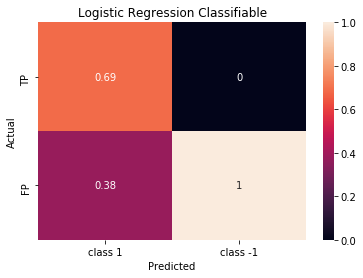

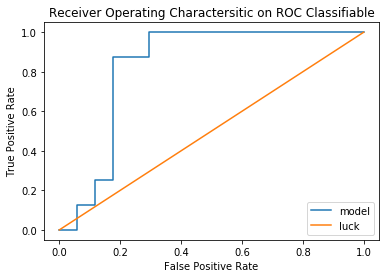

Area under the curve: 0.8308823529411764


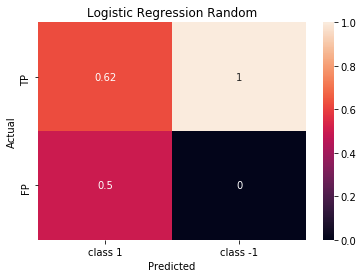

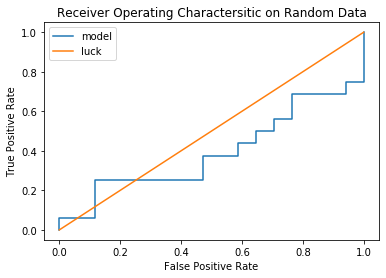

Area under the curve: 0.39338235294117646


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# The Classifiable Data
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_mat(y_pred, y_test, 'Logistic Regression Classifiable')
roc_plot(clf, X_train, y_train, X_test, y_test, 'ROC Classifiable')


# The Random Data
clf.fit(X_train_rand, y_train_rand)
y_pred_rand = clf.predict(X_test_rand)
conf_mat(y_pred_rand, y_test_rand, 'Logistic Regression Random')
roc_plot(clf, X_train_rand, y_train_rand, X_test_rand, y_test_rand, 'Random Data')

10000


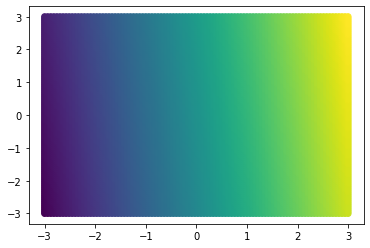

In [16]:
X_grid = np.zeros((10000,2))
count = 0
for i in np.linspace(-3,3,100):
    for j in np.linspace(-3,3,100):
        X_grid[count,:] = (i,j)
        count +=1
print(count)

# Probability surface
y_grid = clf.decision_function(X_grid)
plt.scatter(X_grid[:,0], X_grid[:,1],c=y_grid)


## Random Forest Classifiers
### Finding which features are important
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

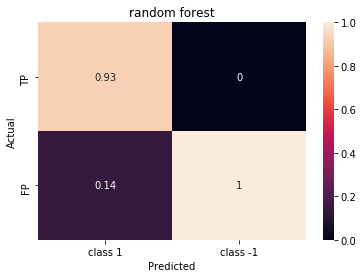

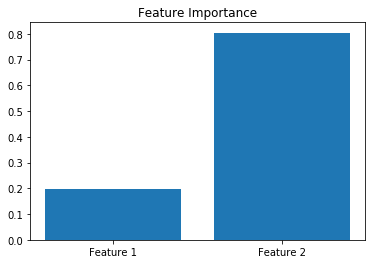

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)
conf_mat(y_pred,y_test, 'random forest')

plt.title('Feature Importance')
_ = plt.bar(["Feature 1","Feature 2"], clf.feature_importances_)

## If we have time, we can talk about a few other examples...

## Support-Vector Machine

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



In [18]:
from sklearn import svm
# initialize the model, with gamma = 0.1
clf = svm.SVC(gamma=0.1)
clf.fit(X_train_rand, y_train_rand)
y_pred_rand = clf.predict(X_test_rand)

0.8484848484848485


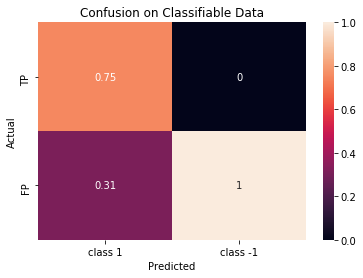

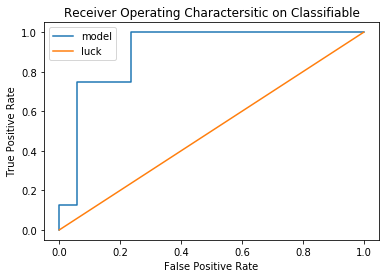

Area under the curve: 0.9044117647058822


In [19]:
# use the classifiable data
clf = svm.SVC(gamma=1, C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

conf_mat(y_pred,y_test, 'Confusion on Classifiable Data')

roc_plot(clf, X_train, y_train, X_test, y_test, "Classifiable")

## k Nearest Neighbors

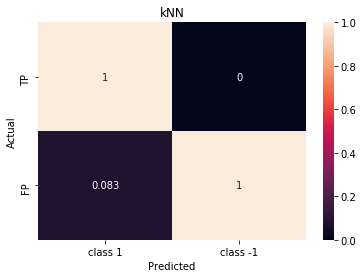

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)
conf_mat(y_pred,y_test, 'kNN')


## Neural Network



C:\Users\nebarlow\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


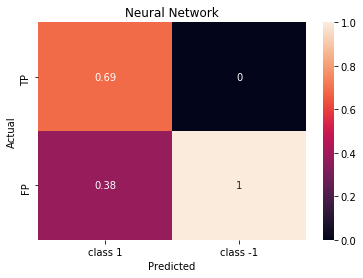

In [21]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(200, ))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)
conf_mat(y_pred,y_test, 'Neural Network')

## Gaussian Process


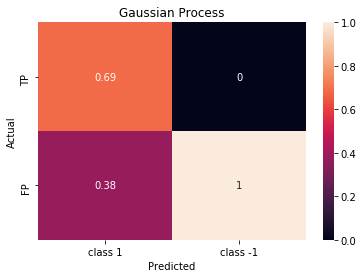

In [22]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)
conf_mat(y_pred,y_test, 'Gaussian Process')

## Naive Bayes

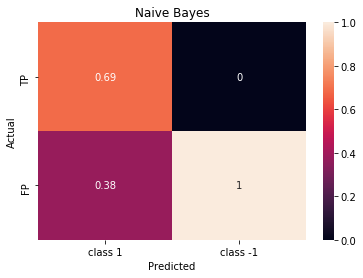

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)
conf_mat(y_pred,y_test, 'Naive Bayes')

## Quadratic Discriminant Analysis

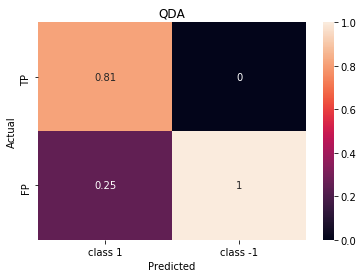

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)
conf_mat(y_pred,y_test, 'QDA')


## 1-Hour Lab Practical

# Part 1: Easy

You are building a syring pump in your hackspace practial. Though it is simple enough to do this by 'hand' or on excel, it is a good exercise to try our sklearn (scikit - learn). Given the voltage or current setting, you will measure flow rates. 

Build a function that takes in raw voltage and flow rate data. Then output a calibration curve parameter set (slope and intercept).

Build a function that takes a voltage in and outputs flow rate. You will use this in your practical pump work with David Miller.



https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


# Part 2: Challenge

### Binary Classification: Predicting the mechanism of action (MOA) for polar and nonpolar narcotic compounds

Quantitative structure-activity relationships (QSARs) are the early incarnations of modern machine learning. Here we are looking to predict toxicity categories (MOAs) for a given structure based on known data. For example, see Table 7 from [Ivanciuc - Applications of Support Vector Machines in Chemistry](http://www.cbs.dtu.dk/courses/27623.algo/material/SVM/Ivanciuc_SVM_CCR_2007_23_291.pdf), where the energy of the **highest occupied molecular orbital** $EHOMO$,  **lowest unoccupied molecular orbital** $ELUMO$, and most negative partial charge on any non-hydrogen atom in the molecule **$Q^-$**